In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

https://www.incharge.org/debt-relief/debt-statistics-state/

In [2]:
df_state = pd.read_csv('../data/USA/State/state_data.csv')
df_state.head(4)

,N,State_Name,Code,GDP_PC,gini,cost_living,hdi,pbf,ccdebt,spi,unemp
0,1,Alabama,AL,45219,0.4847,89.87,4.04,519,7105,33.60,3.9
1,2,Alaska,AK,73205,0.4081,122.88,5.06,56,13048,43.77,6.5
2,3,Arizona,AZ,48055,0.4713,97.66,4.89,305,7100,45.43,4.7
3,4,Arkansas,AR,42454,0.4719,89.17,3.91,374,6747,32.10,3.6


In [3]:
d_stc = {}
for st in pickle.load(open( "state_coef.pickle", "rb" )):
    d_stc[st[0]] = st[1]

In [4]:
def f_class(x):
    if x<0:
        return -1
    elif x>0:
        return 1
    return 0

In [5]:
lcoefs = []
for c in df_state.Code:
    lcoefs.append(d_stc[c])
df_state['m_coefs'] = lcoefs 
df_state['s_class'] = df_state['m_coefs'].apply(f_class)

df_state.head()

,N,State_Name,Code,GDP_PC,gini,cost_living,hdi,pbf,ccdebt,spi,unemp,m_coefs,s_class
0,1,Alabama,AL,45219,0.4847,89.87,4.04,519,7105,33.60,3.9,0.162021,1
1,2,Alaska,AK,73205,0.4081,122.88,5.06,56,13048,43.77,6.5,0.000000,0
2,3,Arizona,AZ,48055,0.4713,97.66,4.89,305,7100,45.43,4.7,0.000000,0
3,4,Arkansas,AR,42454,0.4719,89.17,3.91,374,6747,32.10,3.6,0.195082,1
4,5,California,CA,74205,0.4899,148.53,5.40,275,10496,45.53,4.3,-0.029822,-1


In [6]:
df_state[['GDP_PC','gini','cost_living','hdi','pbf','ccdebt','spi','unemp','m_coefs']].corr(method ='pearson') 

,GDP_PC,gini,cost_living,hdi,pbf,ccdebt,spi,unemp,m_coefs
GDP_PC,1.000000,0.390454,0.568183,0.387166,-0.306691,0.201094,0.180761,0.280926,-0.252922
gini,0.390454,1.000000,0.183809,-0.065730,0.071348,-0.264001,-0.290851,0.378864,0.166559
cost_living,0.568183,0.183809,1.000000,0.560732,-0.372595,0.322857,0.312511,0.096921,-0.246070
hdi,0.387166,-0.065730,0.560732,1.000000,-0.314365,0.136870,0.802685,-0.155014,-0.381290
pbf,-0.306691,0.071348,-0.372595,-0.314365,1.000000,-0.181291,-0.263028,0.002495,0.131658
ccdebt,0.201094,-0.264001,0.322857,0.136870,-0.181291,1.000000,-0.057496,0.263717,-0.124424
spi,0.180761,-0.290851,0.312511,0.802685,-0.263028,-0.057496,1.000000,-0.486418,-0.464097
unemp,0.280926,0.378864,0.096921,-0.155014,0.002495,0.263717,-0.486418,1.000000,0.040608
m_coefs,-0.252922,0.166559,-0.246070,-0.381290,0.131658,-0.124424,-0.464097,0.040608,1.000000


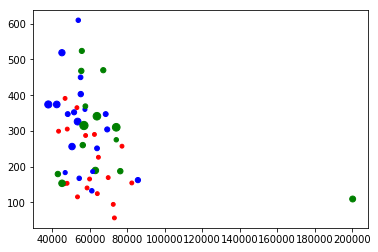

In [7]:
%matplotlib inline
plt.scatter(df_state.GDP_PC, df_state.pbf, marker = 'o', c = df_state.s_class.map({0:'red', -1:'green',1:'blue'}),
            s=150*(np.abs(df_state.m_coefs)+0.1))
plt.show()

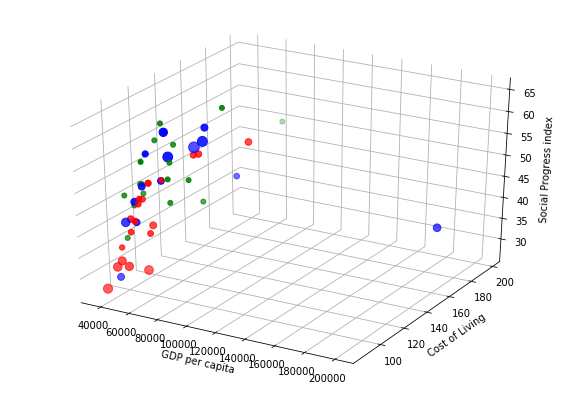

In [8]:
%matplotlib qt 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

xs = df_state.GDP_PC
ys = df_state.cost_living
zs = df_state.spi
ax.scatter(xs, ys, zs, marker='o', c=df_state.s_class.map({0:'green', -1:'blue',1:'red'}),
           s=250*(np.abs(df_state.m_coefs)+0.1))

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Cost of Living')
ax.set_zlabel('Social Progress index')

plt.show()

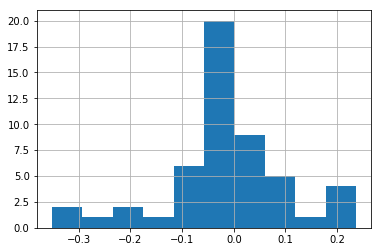

In [9]:
%matplotlib inline
df_state.m_coefs.hist()

In [10]:
X = df_state[['GDP_PC','gini','cost_living','hdi','pbf','ccdebt','spi','unemp']]
y = df_state['m_coefs']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45, shuffle=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso


#used_vars = ['GDP_PC','gini','cost_living','hdi','pbf','spi','unemp']
used_vars = ['GDP_PC','cost_living','spi','unemp']  #second selection based on ridge

cst = ColumnSelectTransformer(used_vars)
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
sc = MinMaxScaler()
#rdg = Ridge(alpha=1)
clf = Lasso(alpha=0.002)

pipe_rdg = Pipeline([('colsel', cst), ('scaler', sc), ('lasso', clf)])

In [13]:
pipe_rdg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['GDP_PC', 'cost_living', 'spi', 'unemp'])), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lasso', Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [14]:
pipe_rdg.named_steps['lasso'].coef_

array([-0.04209443, -0.00859046, -0.18452527, -0.046152  ])

In [15]:
y_pred = pipe_rdg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.013098127611671272

0.0005 : 0.013624 <br>
0.0010 : 0.013407 <br>
0.0020 : 0.013098 <br>
0.0030 : 0.013348 <br>

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer

used_vars = ['GDP_PC','cost_living','spi','unemp']  #selected by ridge

cst = ColumnSelectTransformer(used_vars)
sc = MinMaxScaler()
clf = Lasso(alpha=0.002)

pipe_lss = Pipeline([('colsel', cst), ('scaler', sc), ('lasso', clf)])
pipe_lss.fit(X, y)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['GDP_PC', 'cost_living', 'spi', 'unemp'])), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lasso', Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [18]:
import joblib
joblib.dump(pipe_lss, 'state_lss.pkl')

['state_lss.pkl']

In [19]:
import joblib
#from transformers import ColumnSelectTransformer

pipe_lss = joblib.load('state_lss.pkl')

In [20]:
y_pred = pipe_lss.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.012771655888250693

Off course now is smaller, fitted with all data: 0.012771655888250693